<a href="https://colab.research.google.com/github/Shraddhaa08/Customer_Segmentation/blob/main/Pro1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from datetime import datetime
import matplotlib.pyplot as plt
# To load the data
file_path ='/content/cubics_progress_goal_data_final.csv'
df = pd.read_csv(file_path)

In [3]:
#1: Count the total number of unique users
unique_users = df["UserName"].nunique()
print("Total unique users:", unique_users)

Total unique users: 1000


In [4]:
#2: List all distinct course titles
distinct_courses = df["Course Title"].unique()
print("Distinct course titles:", distinct_courses)

Distinct course titles: ['PENA PPS A3 Problem Solving SME L1' 'PENA PPS WPR SME L1'
 'PENA PPS SQCDP SME L3' 'PENA PPS 6S SME L1'
 'PENA PPS Standard Work SME L3' 'PENA PPS WPR SME L3'
 'PENA PPS A3 Problem Solving SME L3' 'PENA PPS 6S SME L2'
 'PENA PPS SQCDP SME L1' 'PENA PPS WPR SME L2'
 'PENA PPS A3 Problem Solving SME L2' 'PENA PPS 6S SME L3'
 'PENA PPS SQCDP SME L2' 'PENA PPS Standard Work SME L1'
 'PENA PPS Standard Work SME L2']


In [5]:
#3: Filter the data to show only completed courses
completed_courses = df[df["Course Status"] == "Completed"]
print("Completed courses:")
print(completed_courses)

Completed courses:
      UserName Active Status  Direct Manager First Name Last Name  \
4         2355           YES  Caitlin Little      Jason   Hendrix   
6         2355           YES  Caitlin Little      Jason   Hendrix   
7         2355           YES  Caitlin Little      Jason   Hendrix   
9         7921           YES   Matthew Ortiz     Ashley   Russell   
25        3591           YES   Jonathan Wade      Robin   Nielsen   
...        ...           ...             ...        ...       ...   
7938      4223           YES      Tina Scott     Angela    Murphy   
7941      4223           YES      Tina Scott     Angela    Murphy   
7942      4223           YES      Tina Scott     Angela    Murphy   
7945      3588           YES   Patrick Payne    Allison     Combs   
7949      6261           YES   Matthew Ortiz    Cynthia     Weber   

                            Course Title Course Status Completion Date  \
4          PENA PPS Standard Work SME L3     Completed      17-12-2024   
6   

In [6]:
#4: Identify the courses with 100% progress
courses_with_full_progress = df[df["Course Progress (%)"] == 100]
print("Courses with 100% progress:")
print(courses_with_full_progress)

Courses with 100% progress:
      UserName Active Status  Direct Manager First Name Last Name  \
1         3116           YES     Amanda Pena      Brian  Johnston   
4         2355           YES  Caitlin Little      Jason   Hendrix   
6         2355           YES  Caitlin Little      Jason   Hendrix   
7         2355           YES  Caitlin Little      Jason   Hendrix   
9         7921           YES   Matthew Ortiz     Ashley   Russell   
...        ...           ...             ...        ...       ...   
7938      4223           YES      Tina Scott     Angela    Murphy   
7941      4223           YES      Tina Scott     Angela    Murphy   
7942      4223           YES      Tina Scott     Angela    Murphy   
7945      3588           YES   Patrick Payne    Allison     Combs   
7949      6261           YES   Matthew Ortiz    Cynthia     Weber   

                            Course Title Course Status Completion Date  \
1                    PENA PPS WPR SME L1      Enrolled             Na

In [8]:
#5: Count the number of courses completed by each user
courses_completed_by_user = (
    completed_courses.groupby("UserName")["Course Title"].count()
)
print("Number of courses completed by each user:")
print(courses_completed_by_user)

Number of courses completed by each user:
UserName
1005    2
1007    3
1010    6
1017    2
1061    7
       ..
9934    1
9937    3
9956    1
9960    2
9990    3
Name: Course Title, Length: 803, dtype: int64


In [9]:
#6:Calculate the average course progress for all users
average_progress = df["Course Progress (%)"].mean()
print(f"Average Course Progress for All Users: {average_progress:.2f}%")

Average Course Progress for All Users: 62.19%


In [10]:
#7: Find the top 5 managers with the most users under their supervision
top_managers = df.groupby("Direct Manager")["UserName"].nunique().sort_values(ascending=False).head(5)
print("\nTop 5 Managers with the Most Users:")
print(top_managers)


Top 5 Managers with the Most Users:
Direct Manager
Christopher Franco    34
Amanda Pena           29
Wendy Hall            28
Patrick Payne         27
David Bowman          25
Name: UserName, dtype: int64


In [11]:
#8: Group users by their active status and calculate the average course progress for each group
average_progress_by_status = df.groupby("Active Status")["Course Progress (%)"].mean()
print("\nAverage Course Progress by Active Status:")
print(average_progress_by_status)


Average Course Progress by Active Status:
Active Status
NO     62.932804
YES    61.959571
Name: Course Progress (%), dtype: float64


In [12]:
#9: Extract and count courses completed in 2024
df["Completion Year"] = pd.to_datetime(df["Completion Date"],dayfirst=True, errors="coerce").dt.year
courses_completed_2024 = df[df["Completion Year"] == 2024]
num_courses_completed_2024 = courses_completed_2024.shape[0]
print(f"\nNumber of Courses Completed in 2024: {num_courses_completed_2024}")


Number of Courses Completed in 2024: 1966


In [13]:
#10: Determine the percentage of courses completed vs. in progress
total_courses = df.shape[0]
completed_courses = df[df["Course Status"] == "Completed"].shape[0]
in_progress_courses = df[df["Course Status"] == "InProgress"].shape[0]

In [14]:
completed_percentage = (completed_courses / total_courses) * 100
in_progress_percentage = (in_progress_courses / total_courses) * 100

In [15]:
print(f"\nPercentage of Courses Completed: {completed_percentage:.2f}%")
print(f"Percentage of Courses In Progress: {in_progress_percentage:.2f}%")


Percentage of Courses Completed: 24.73%
Percentage of Courses In Progress: 50.33%


In [16]:
#11: Identify users who have completed all their enrolled courses
completed_users = df.groupby('UserName')['Course Status'].apply(lambda x: all(x == 'Completed')).reset_index()
completed_users = completed_users[completed_users['Course Status'] == True]
print("Users who completed all their courses:")
print(completed_users)

Users who completed all their courses:
     UserName  Course Status
84       1808           True
172      2603           True
351      4263           True
416      4892           True
445      5119           True
464      5262           True
592      6381           True
596      6399           True
617      6583           True
708      7265           True
864      8780           True
873      8866           True
909      9142           True


In [17]:
#12: Find users who enrolled in more than 5 courses but have an average progress below 50%
users_above_5_courses = df.groupby('UserName').filter(lambda x: len(x) > 5)
users_low_progress = users_above_5_courses.groupby('UserName')['Course Progress (%)'].mean().reset_index()
users_low_progress = users_low_progress[users_low_progress['Course Progress (%)'] < 50]
print("\nUsers with more than 5 courses but avg progress below 50%:")
print(users_low_progress)


Users with more than 5 courses but avg progress below 50%:
     UserName  Course Progress (%)
15       1219            42.555556
29       1407            47.700000
34       1449            46.923077
36       1497            47.000000
39       1514            48.500000
..        ...                  ...
601      9120            44.875000
614      9353            49.285714
617      9408            38.833333
622      9448            48.142857
657      9916            43.333333

[87 rows x 2 columns]


In [18]:
#13: Generate a summary showing the number of users per manager with their average course progress
manager_summary = df.groupby('Direct Manager').agg(
    num_users=('UserName', 'nunique'),
    avg_progress=('Course Progress (%)', 'mean')
).reset_index()
print("\nNumber of users per manager with average course progress:")
print(manager_summary)


Number of users per manager with average course progress:
         Direct Manager  num_users  avg_progress
0       Alexandra Irwin         20     63.948387
1           Amanda Pace         23     58.964706
2           Amanda Pena         29     61.943231
3       Benjamin Nelson         18     61.853147
4          Beth Edwards         15     60.323529
5        Caitlin Little         22     66.874346
6    Christopher Franco         34     66.530000
7    Christopher Spence         19     60.109489
8         Cory Thompson         18     65.723684
9          David Bowman         25     63.381643
10       Dennis Webster         10     56.841270
11         Donald Boyer         19     59.414062
12          Erica Moore         16     66.190476
13          Erin Harris         18     62.246835
14           Erin Russo         24     67.594595
15        Gerald Stokes         18     60.691275
16        Gregory Davis         23     66.494382
17      Heather Jackson         25     62.405797
18       J

In [20]:
group_size = df.groupby('UserName').size()

In [21]:
#14: Reindex group_size to match completed_users' index
group_size = group_size.reindex(completed_users.index, fill_value=0)

In [22]:
#15:Compare the average course progress between active and inactive users
df['Course Progress (%)'] = pd.to_numeric(df['Course Progress (%)'], errors='coerce')

In [23]:
# Group by 'Active Status' and calculate the average progress
average_progress = df.groupby('Active Status')['Course Progress (%)'].mean()

In [24]:
# To Display the result
print("Average Course Progress by Active Status:")
print(average_progress)

Average Course Progress by Active Status:
Active Status
NO     62.932804
YES    61.959571
Name: Course Progress (%), dtype: float64


In [25]:
# Ensure proper parsing of dates with dayfirst=True
df['Completion Date'] = pd.to_datetime(df['Completion Date'], errors='coerce', dayfirst=True)
df['Enrollment Date'] = pd.to_datetime(df['Enrollment Date'], errors='coerce', dayfirst=True)

In [26]:
# Check for invalid dates
if df['Completion Date'].isnull().any() or df['Enrollment Date'].isnull().any():
    print("Warning: Some dates could not be converted to datetime. They will be ignored.")

In [27]:
# Check for invalid or missing dates
if df['Completion Date'].isnull().any() or df['Enrollment Date'].isnull().any():
    print("Warning: Some dates could not be converted to datetime. They will be ignored.")

In [28]:
# Task 16: Calculate time taken to complete each course and find average duration
df['Completion Time (Days)'] = (df['Completion Date'] - df['Enrollment Date']).dt.days

In [29]:
# Ignore rows where the calculation is invalid
valid_durations = df['Completion Time (Days)'].dropna()
average_duration = valid_durations.mean()
print(f"Average Duration: {average_duration:.2f} days")

Average Duration: 4.19 days


In [30]:
# Task 17: Predict likelihood of completion based on progress percentage
df['Likelihood of Completion'] = df['Course Progress (%)'].apply(lambda x: 'High' if x > 80 else 'Low')

In [31]:
# Task 18: Identify anomalies
anomalies = df[(df['Course Progress (%)'] == 100) & (df['Course Status'] != 'Completed')]
print("Anomalies:")
print(anomalies)

Anomalies:
      UserName Active Status       Direct Manager   First Name   Last Name  \
1         3116           YES          Amanda Pena        Brian    Johnston   
123       9990           YES         Donald Boyer     Brittney      Gibson   
504       9471           YES           Tina Scott          Mia       Poole   
704       8206           YES       Kristen Harris         Ryan    Atkinson   
739       4737           YES          Amanda Pace        Sally      Howard   
807       4691           YES     Justin Rodriguez  Christopher     Johnson   
1068      9178           YES          Mary Martin        Linda    Caldwell   
1218      4550           YES    Nicholas Robinson        James      Harris   
1468      6173           YES         Miguel Yates        James        Lara   
1507      9353           YES    Nicholas Robinson       Morgan        King   
1963      6987           YES        Jonathan Wade     Jeremiah       Frost   
2635      5737           YES          Amanda Pena    

In [32]:
# Task 19: Create a pivot table grouped by direct manager and course title
pivot_table = pd.pivot_table(df, values='Course Progress (%)', index=['Direct Manager', 'Course Title'], aggfunc='mean')
print("Pivot Table:")
print(pivot_table)

Pivot Table:
                                                    Course Progress (%)
Direct Manager  Course Title                                           
Alexandra Irwin PENA PPS 6S SME L1                            58.642857
                PENA PPS 6S SME L2                            60.900000
                PENA PPS 6S SME L3                            68.200000
                PENA PPS A3 Problem Solving SME L1            46.222222
                PENA PPS A3 Problem Solving SME L2            64.416667
...                                                                 ...
William Garcia  PENA PPS Standard Work SME L2                 66.571429
                PENA PPS Standard Work SME L3                 76.625000
                PENA PPS WPR SME L1                           64.750000
                PENA PPS WPR SME L2                           49.090909
                PENA PPS WPR SME L3                           57.181818

[750 rows x 1 columns]


In [33]:
# Task 20: Perform clustering analysis
# Calculate average progress and courses enrolled per user
user_data = df.groupby('UserName').agg(
    AverageProgress=('Course Progress (%)', 'mean'),
    CoursesEnrolled=('Course Title', 'count')
).reset_index()

In [34]:
# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=42)
user_data['Cluster'] = kmeans.fit_predict(user_data[['AverageProgress', 'CoursesEnrolled']])

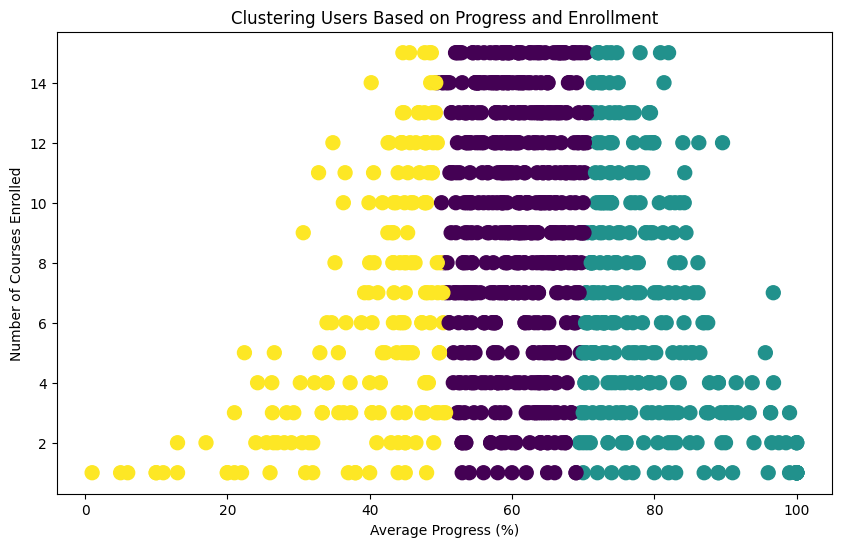

In [35]:
# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(user_data['AverageProgress'], user_data['CoursesEnrolled'], c=user_data['Cluster'], cmap='viridis', s=100)
plt.xlabel('Average Progress (%)')
plt.ylabel('Number of Courses Enrolled')
plt.title('Clustering Users Based on Progress and Enrollment')
plt.show()